# Predicting House Sale Prices in Ames, Iowa

## Introduction

In this project, we'll aim to build a model to predict house sale price in Ames, Iowa. The dataset describes the sale of individual residential property in Ames, Iowa from 2006 to 2010. The dataset has 2930 instances and 82 features. This project uses linear_regression algorithm to find the best features to be used for house prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from IPython.display import display
from sklearn.model_selection import KFold
import itertools

In [2]:
df = pd.read_csv('AmesHousing.txt', delimiter = '\t')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [1]:
# First, define a transform_features function, to do basic data cleaning or low level feature selections. 
# Thiswould be remodifed later
def transform_features(df):
    return df

In [2]:
# Second, define a select_features function, which would be remodified later
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [3]:
# Third, define a train_and_test function, the input is df after transform_features and select_features functions
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    numeric_train = train.select_dtypes(include = ['integer', 'float'])
    numeric_test = test.select_dtypes(include = ['integer', 'float'])
    
    features = numeric_train.columns.drop('SalePrice')
    
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    prediction = lr.predict(test[features])
    
    RMSE = mean_squared_error(prediction, test['SalePrice'])**(0.5)
    
    return RMSE

In [7]:
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

57088.25161263909

# Stage 1. Data Cleaning, minor Feature selection and minor Feature Engineering

- Handle Missing Values:
    - All columns:
        - Drop any with **5%** or more missing values for now.
    - Text columns:
        - Drop any with **1** or more missing values for now.
    - Numerical columns:
        - For columns with missing values, fill in with **the most common value** in the column

### 1a. All columns: Drop any with 5% or more missing values

In [8]:
num_missing = df.isnull().sum()

In [9]:
num_df = len(df)
num_df

2930

In [10]:
drop_missing_cols = num_missing.index[(num_missing)>(2930/20)]

In [11]:
df = df.drop(drop_missing_cols, axis = 1)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


________________________________________________________________________________________________

### 1b. Text columns: Drop any with 1 or more missing values

In [12]:
df_text = df.select_dtypes(include='object')

In [13]:
text_mv_counts = df_text.isnull().sum().sort_values()
text_mv_counts

MS Zoning          0
Paved Drive        0
Functional         0
Kitchen Qual       0
Central Air        0
Heating QC         0
Heating            0
Foundation         0
Exter Cond         0
Exter Qual         0
Sale Type          0
Exterior 2nd       0
Exterior 1st       0
Sale Condition     0
Roof Style         0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Street             0
Lot Shape          0
Land Contour       0
Roof Matl          0
Land Slope         0
Lot Config         0
Utilities          0
Electrical         1
Mas Vnr Type      23
Bsmt Cond         80
Bsmt Qual         80
BsmtFin Type 1    80
BsmtFin Type 2    81
Bsmt Exposure     83
dtype: int64

In [14]:
drop_missing_cols_2 = text_mv_counts[text_mv_counts>0]
drop_missing_cols_2 

Electrical         1
Mas Vnr Type      23
Bsmt Cond         80
Bsmt Qual         80
BsmtFin Type 1    80
BsmtFin Type 2    81
Bsmt Exposure     83
dtype: int64

In [15]:
df = df.drop(drop_missing_cols_2.index, axis = 1)

_________________________________________________________________________________________________________

### 1c. Numerical columns: For columns with missing values, fill in with the most common values in that column

In [16]:
# this is to add a module to change display mode to row display instead of column display, for easy comparision
import pandas as pd
import numpy as np
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [17]:
num_missing = df.select_dtypes(include = ['integer','float']).isnull().sum()

In [18]:
display(df.mean(), num_missing)

Order              1.465500e+03
PID                7.144645e+08
MS SubClass        5.738737e+01
Lot Area           1.014792e+04
Overall Qual       6.094881e+00
Overall Cond       5.563140e+00
Year Built         1.971356e+03
Year Remod/Add     1.984267e+03
Mas Vnr Area       1.018968e+02
BsmtFin SF 1       4.426296e+02
BsmtFin SF 2       4.972243e+01
Bsmt Unf SF        5.592625e+02
Total Bsmt SF      1.051615e+03
1st Flr SF         1.159558e+03
2nd Flr SF         3.354560e+02
Low Qual Fin SF    4.676792e+00
Gr Liv Area        1.499690e+03
Bsmt Full Bath     4.313525e-01
Bsmt Half Bath     6.113388e-02
Full Bath          1.566553e+00
Half Bath          3.795222e-01
Bedroom AbvGr      2.854266e+00
Kitchen AbvGr      1.044369e+00
TotRms AbvGrd      6.443003e+00
Fireplaces         5.993174e-01
Garage Cars        1.766815e+00
Garage Area        4.728197e+02
Wood Deck SF       9.375188e+01
Open Porch SF      4.753345e+01
Enclosed Porch     2.301160e+01
3Ssn Porch         2.592491e+00
Screen P

Order               0
PID                 0
MS SubClass         0
Lot Area            0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Cars         1
Garage Area         1
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
SalePrice           0
dtype: int64

In [19]:
df = df.fillna(df.mode().iloc[0])

In [20]:
df.isnull().sum().value_counts()

0    64
dtype: int64

### 1d. Create new features

In [21]:
display(df['Yr Sold'], df['Year Built'])

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2925    2006
2926    2006
2927    2006
2928    2006
2929    2006
Name: Yr Sold, Length: 2930, dtype: int64

0       1960
1       1961
2       1958
3       1968
4       1997
        ... 
2925    1984
2926    1983
2927    1992
2928    1974
2929    1993
Name: Year Built, Length: 2930, dtype: int64

In [286]:
# add the years_sold feature
years_sold = df['Yr Sold'] - df['Year Built']
years_sold.value_counts().sort_index()

-1        1
 0      116
 1      218
 2       90
 3       60
       ... 
 127      2
 128      2
 129      2
 135      1
 136      1
Length: 128, dtype: int64

In [23]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [24]:
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

In [25]:
df = df.drop([1702, 2180, 2181], axis = 0)

In [26]:
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

### 1e. Drop columns that:
    - that aren't useful for ML
    - leak data about the final sale, read more about columns

In [27]:
df = df.drop(['PID', 'Order'], axis = 1)

In [28]:
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis =1)

### 1f. Update the transform_features() function

In [287]:
def transform_features(df):
    # 1a.All columns: Drop any with 5% or more missing values
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing.index[(num_missing)>(2930/20)]
    df = df.drop(drop_missing_cols, axis = 1)
    
    #1b.Text columns: Drop any with 1 or more missing values
    df_text = df.select_dtypes(include='object')
    text_mv_counts = df_text.isnull().sum().sort_values()
    drop_missing_cols_2 = text_mv_counts[text_mv_counts>0]
    df = df.drop(drop_missing_cols_2.index, axis = 1)
    
    # 1c.Numerical columns: For columns with missing values, fill in with the most common values in that column
    num_missing = df.select_dtypes(include = ['integer','float']).isnull()
    df = df.fillna(df.mode().iloc[0])
    df.isnull().sum().value_counts()
    
    # 1d.Create new features
    years_sold = df['Yr Sold'] - df['Year Built']
    years_sold.value_counts().sort_index()
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis = 0)
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    #1e.Drop columns that: that aren't useful for ML, leak data about the final sale, read more about columns
    df = df.drop(['PID', 'Order'], axis = 1)
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis =1)
    
    return df

In [30]:
df = pd.read_csv("AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.367312413066

# Stage 2 Feature Selections + Feature Engineering

### 2a. Select features having 0.4 or larger correlation with SalePrice

In [126]:
numeric_df = df.select_dtypes(include = ['integer','float'])
numeric_df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [129]:
abs_corr_coeffs = df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 2       0.005891
Misc Val           0.015691
Yr Sold            0.030569
Order              0.031408
3Ssn Porch         0.032225
Mo Sold            0.035259
Bsmt Half Bath     0.035835
Low Qual Fin SF    0.037660
Pool Area          0.068403
MS SubClass        0.085092
Overall Cond       0.101697
Screen Porch       0.112151
Kitchen AbvGr      0.119814
Enclosed Porch     0.128787
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
PID                0.246521
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

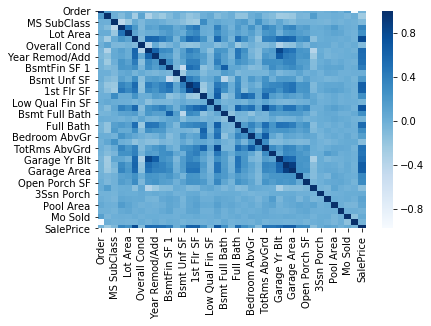

In [33]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='Blues')

In [34]:
# Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coeffs[abs_corr_coeffs>0.4]

BsmtFin SF 1      0.432914
Fireplaces        0.474558
TotRms AbvGrd     0.495474
Mas Vnr Area      0.508285
Garage Yr Blt     0.526965
Year Remod/Add    0.532974
Full Bath         0.545604
Year Built        0.558426
1st Flr SF        0.621676
Total Bsmt SF     0.632280
Garage Area       0.640401
Garage Cars       0.647877
Gr Liv Area       0.706780
Overall Qual      0.799262
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [288]:
# Drop columns with less than 0.4 correlation with SalePrice
transform_df = df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

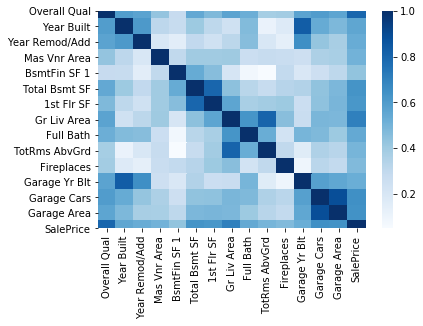

In [36]:
sns.heatmap(transform_df.corr(), cmap='Blues')

### 2b. Change categorical columns

In [37]:
# identify a list of column names that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

- Check columns that are numerical but need to be encoded as categorical because the numbers don't have any semantic meaning
- If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

In [304]:
# Check to see which categorical columns have we still carried with us?
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

In [305]:
display(transform_cat_cols, nominal_features)

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

['PID',
 'MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [307]:
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.unique())).sort_values()
uniqueness_counts

Central Air      2
Street           2
Land Contour     4
Lot Config       5
Bldg Type        5
Heating          6
Roof Style       6
Foundation       6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
MS SubClass     16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [302]:
# How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.unique())).sort_values()
uniqueness_counts
# Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
drop_nonuniq_cols
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

KeyError: "['Garage Type', 'Alley', 'Sale Type', 'Sale Condition', 'Misc Feature', 'Mas Vnr Type'] not in index"

In [41]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 55 columns):
MS Zoning         2930 non-null object
Street            2930 non-null object
Alley             198 non-null object
Lot Shape         2930 non-null object
Land Contour      2930 non-null object
Utilities         2930 non-null object
Lot Config        2930 non-null object
Land Slope        2930 non-null object
Condition 1       2930 non-null object
Condition 2       2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Overall Qual      2930 non-null int64
Year Built        2930 non-null int64
Year Remod/Add    2930 non-null int64
Roof Style        2930 non-null object
Roof Matl         2930 non-null object
Mas Vnr Type      2907 non-null object
Mas Vnr Area      2907 non-null float64
Exter Qual        2930 non-null object
Exter Cond        2930 non-null object
Foundation        2930 non-null object
Bsmt Qual         2850 non-null object

In [42]:
# Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])

In [43]:
text_cols = text_cols.astype('category')

In [44]:
# Create dummy columns and add back to the dataframe!
transform_df.join(pd.get_dummies(text_cols)).drop(text_cols, axis = 1)

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,6,1960,1960,112.0,639.0,1080.0,1656,1656,1,7,...,0,0,0,1,0,0,0,0,1,0
1,5,1961,1961,0.0,468.0,882.0,896,896,1,5,...,0,0,0,1,0,0,0,0,1,0
2,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,6,...,0,0,0,1,0,0,0,0,1,0
3,7,1968,1968,0.0,1065.0,2110.0,2110,2110,2,8,...,0,0,0,1,0,0,0,0,1,0
4,5,1997,1998,0.0,791.0,928.0,928,1629,2,6,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,1984,1984,0.0,819.0,1003.0,1003,1003,1,6,...,0,0,0,1,0,0,0,0,1,0
2926,5,1983,1983,0.0,301.0,864.0,902,902,1,5,...,0,0,0,1,0,0,0,0,1,0
2927,5,1992,1992,0.0,337.0,912.0,970,970,1,6,...,0,0,0,1,0,0,0,0,1,0
2928,5,1974,1975,0.0,1071.0,1389.0,1389,1389,1,6,...,0,0,0,1,0,0,0,0,1,0


### 2c. Update select_features() function

In [115]:
def transform_features(df):
    # 1a.
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing.index[(num_missing)>(2930/20)]
    df = df.drop(drop_missing_cols, axis = 1)
    
    #1b.
    df_text = df.select_dtypes(include='object')
    text_mv_counts = df_text.isnull().sum().sort_values()
    drop_missing_cols_2 = text_mv_counts[text_mv_counts>0]
    df = df.drop(drop_missing_cols_2.index, axis = 1)
    
    # 1c.
    num_missing = df.select_dtypes(include = ['integer','float']).isnull()
    df = df.fillna(df.mode().iloc[0])
    df.isnull().sum().value_counts()
    
    # 1d.
    years_sold = df['Yr Sold'] - df['Year Built']
    years_sold.value_counts().sort_index()
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis = 0)
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    df = df.drop(['PID', 'Order'], axis = 1)
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis =1)
    
    return df

In [331]:
def select_features(df, coeff_threshold = 0.4, uniq_threshold = 10):
    numerical_df = df.select_dtypes(include=['integer', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    
    # 2a. Select features having 0.4 or larger correlation with SalePrice
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    #2b. Change categorical columns
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > uniq_threshold].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

In [180]:
# Add KFold to the train/test validation
def train_and_test(df, k):
    
    numeric_df = df.select_dtypes(include=[np.number])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        np.random.seed(0)
        shuffled_df = df.loc[(np.random.permutation(len(df)))]
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    
    else:
        kf = KFold(n_splits = k, shuffle = True, random_state =1)
        rmse_list = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            lr.fit(train[features], train["SalePrice"])
            predictions_one = lr.predict(test[features])
            
            mse = mean_squared_error(test["SalePrice"], predictions_one)
            rmse = np.sqrt(mse)
            rmse_list.append(rmse)
        avg_rmse = np.mean(rmse_list)
        return avg_rmse

In [310]:
df = pd.read_csv("AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)

In [318]:
n = np.arange(0.01, 0.2, 0.01)
n

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [6]:
kf1 = KFold(n_splits = 2)
a = np.arange(0,10)
for train_index, test_index in kf1.split(a):
    print(train_index, test_index)

[5 6 7 8 9] [0 1 2 3 4]
[0 1 2 3 4] [5 6 7 8 9]


# Stage 3. Validation

### 3a. Feature Engineer: experiment the coeff_threshold, which controls what correlated features to use

In [325]:
n = np.arange(0.01, 0.2, 0.01)
rmse_dict_cor = {}
for i in n: 
    filtered_df = select_features(transform_df, coeff_threshold=i, uniq_threshold=10)
    rmse_dict_cor[i] = train_and_test(filtered_df, k=4)
rmse_dict_cor

{0.01: 28557.383514282505,
 0.02: 28555.452884093193,
 0.03: 28555.452884093193,
 0.04: 28528.95954040133,
 0.05: 28528.95954040133,
 0.060000000000000005: 28528.95954040133,
 0.06999999999999999: 28435.661642383035,
 0.08: 28435.661642383035,
 0.09: 28435.661642383035,
 0.09999999999999999: 28435.661642383035,
 0.11: 28584.863325083596,
 0.12: 28680.147995560023,
 0.13: 28645.226522785466,
 0.14: 28645.226522785466,
 0.15000000000000002: 28880.249961798803,
 0.16: 28880.249961798803,
 0.17: 28880.249961798803,
 0.18000000000000002: 28880.249961798803,
 0.19: 28951.82881752812}

From above dictionary, we know that coeff_threshold at 0.1 is the lowest

### 3b. Feature Selection: experiment the uniq_threshold, which controls what categorical columns to use

In [332]:
np.arange(1, 30)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [333]:
n = np.arange(1, 30)
rmse_dict_uniq = {}
for i in n: 
    filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=i)
    rmse_dict_uniq[i] = train_and_test(filtered_df, k=4)

{1: 30058.80142163189,
 2: 30081.12817831131,
 3: 30081.12817831131,
 4: 29876.216443896024,
 5: 28977.482228980552,
 6: 29180.04836068082,
 7: 29229.77385372782,
 8: 29203.09214214023,
 9: 29111.434972870517,
 10: 29111.434972870517,
 11: 29111.434972870517,
 12: 29111.434972870517,
 13: 29111.434972870517,
 14: 29111.434972870517,
 15: 29111.434972870517,
 16: 29033.405916033265,
 17: 29360.17780464066,
 18: 29360.17780464066,
 19: 29360.17780464066,
 20: 29360.17780464066,
 21: 29360.17780464066,
 22: 29360.17780464066,
 23: 29360.17780464066,
 24: 29360.17780464066,
 25: 29360.17780464066,
 26: 29360.17780464066,
 27: 29360.17780464066,
 28: 27492.881602549514,
 29: 27492.881602549514}

In [334]:
display(rmse_dict_uniq, uniqueness_counts)

{1: 30058.80142163189,
 2: 30081.12817831131,
 3: 30081.12817831131,
 4: 29876.216443896024,
 5: 28977.482228980552,
 6: 29180.04836068082,
 7: 29229.77385372782,
 8: 29203.09214214023,
 9: 29111.434972870517,
 10: 29111.434972870517,
 11: 29111.434972870517,
 12: 29111.434972870517,
 13: 29111.434972870517,
 14: 29111.434972870517,
 15: 29111.434972870517,
 16: 29033.405916033265,
 17: 29360.17780464066,
 18: 29360.17780464066,
 19: 29360.17780464066,
 20: 29360.17780464066,
 21: 29360.17780464066,
 22: 29360.17780464066,
 23: 29360.17780464066,
 24: 29360.17780464066,
 25: 29360.17780464066,
 26: 29360.17780464066,
 27: 29360.17780464066,
 28: 27492.881602549514,
 29: 27492.881602549514}

Central Air      2
Street           2
Land Contour     4
Lot Config       5
Bldg Type        5
Heating          6
Roof Style       6
Foundation       6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
MS SubClass     16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [352]:
uniqueness_counts.index.drop(['Central Air', 'Street', 'Exterior 1st', 'Exterior 2nd'])

Index(['Land Contour', 'Lot Config', 'Bldg Type', 'Heating', 'Roof Style',
       'Foundation', 'MS Zoning', 'Condition 2', 'House Style', 'Roof Matl',
       'Condition 1', 'MS SubClass', 'Neighborhood'],
      dtype='object')

**Because, the uniq_threshold is, every uniq columns that are larger than the uniqthreshold. For example, when uniq_threshold = 1, it drops everything, because all values in the uniqueness_counts are larger than 1. However, when uniq_threshold = 2, it keeps 'Central Air' and 'Street', but drop the rest.
So, checking the change of the rmse_dict_uniq, you can tell which features to drop and what to keep.**

After comparing the rmse_dict_uniq, in which uniq_threshold range from 1 - 30, with uniqueness_counts, **columns would be dropped are: central air, street, exterior 1st, exterior 2nd.** The rest columns we will keep. The reason to drop exterior 1st is, although when uniq_threshold is 16, rmse dropped, the decrease is very minimum, only from 29111 to 29033. Also, exterior 2nd, when uniq_threshold is 17, rmse increasesed. Exterior 1st and Exterior 2nd, based columns description, are the same thing. So, drop exterior. 

In [339]:
# So, we updated the selct_features function, instead of using uniq_threshold to cut off the categorical columns, 
# we dropped the 'central air, street, exterior 1st, exterior 2nd'.
def select_features(df, coeff_threshold = 0.4):
    numerical_df = df.select_dtypes(include=['integer', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = ['Central Air', 'Street', 'Exterior 1st', 'Exterior 2nd']
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

In [340]:
filtered_df = select_features(transform_df, coeff_threshold=0.4)
rmse_dict_columns = train_and_test(filtered_df, k=4)
rmse_dict_columns

27247.730978110078

- Tested results are indeed smaller than any value we achieved before, so prove this this column selection is good
- Then, retest the coef_threshold again, just to confirm

In [342]:
n = np.arange(0.01, 0.2, 0.01)
rmse_dict_cor = {}
for i in n: 
    filtered_df = select_features(transform_df, coeff_threshold=i)
    rmse_dict_cor[i] = train_and_test(filtered_df, k=4)
rmse_dict_cor

{0.01: 26765.81987135442,
 0.02: 26765.653253214317,
 0.03: 26765.653253214317,
 0.04: 26734.300514947092,
 0.05: 26734.300514947092,
 0.060000000000000005: 26734.300514947092,
 0.06999999999999999: 26627.344706905602,
 0.08: 26627.344706905602,
 0.09: 26622.182700732126,
 0.09999999999999999: 26622.182700732126,
 0.11: 26836.959430915347,
 0.12: 26947.20575263055,
 0.13: 26905.89048952023,
 0.14: 26905.89048952023,
 0.15000000000000002: 27074.018768525984,
 0.16: 27074.018768525984,
 0.17: 27074.018768525984,
 0.18000000000000002: 27074.018768525984,
 0.19: 27138.46506927669}

It is confirmed that coeff_threshold at 0.1 results the lowest rmse

### 3c. KFold Cross Validation

In [343]:
df = pd.read_csv("AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.1)
rmse_dict = {}
# change k to see how rmse changes
for i in range(0, 30):
    rmse = train_and_test(filtered_df, k=i)
    rmse_dict[i] = rmse
        
rmse_dict

C:\Users\BIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


31159.98584182165
24607.885739241403


{0: 31159.98584182165,
 1: 27883.935790531526,
 2: 27488.277433679348,
 3: 27330.729334205622,
 4: 26622.182700732126,
 5: 26231.501379260684,
 6: 26107.628518047626,
 7: 26167.269293523506,
 8: 26050.959792036905,
 9: 25871.072787690468,
 10: 25722.32836026229,
 11: 25726.07353761627,
 12: 25650.677702316694,
 13: 25508.928716534592,
 14: 25620.50406304513,
 15: 25464.280227095023,
 16: 25714.956669000858,
 17: 25542.487698413555,
 18: 25225.875027086095,
 19: 25172.86446356838,
 20: 25015.68119993209,
 21: 25008.4000054712,
 22: 24861.68315548054,
 23: 24868.281053322058,
 24: 24944.343522783183,
 25: 24883.787136079125,
 26: 24937.977987900485,
 27: 24812.891538409905,
 28: 24802.654133057928,
 29: 24832.779845602807}

In [344]:
rmse_dict

{0: 31159.98584182165,
 1: 27883.935790531526,
 2: 27488.277433679348,
 3: 27330.729334205622,
 4: 26622.182700732126,
 5: 26231.501379260684,
 6: 26107.628518047626,
 7: 26167.269293523506,
 8: 26050.959792036905,
 9: 25871.072787690468,
 10: 25722.32836026229,
 11: 25726.07353761627,
 12: 25650.677702316694,
 13: 25508.928716534592,
 14: 25620.50406304513,
 15: 25464.280227095023,
 16: 25714.956669000858,
 17: 25542.487698413555,
 18: 25225.875027086095,
 19: 25172.86446356838,
 20: 25015.68119993209,
 21: 25008.4000054712,
 22: 24861.68315548054,
 23: 24868.281053322058,
 24: 24944.343522783183,
 25: 24883.787136079125,
 26: 24937.977987900485,
 27: 24812.891538409905,
 28: 24802.654133057928,
 29: 24832.779845602807}

Text(0, 0.5, 'rmse')

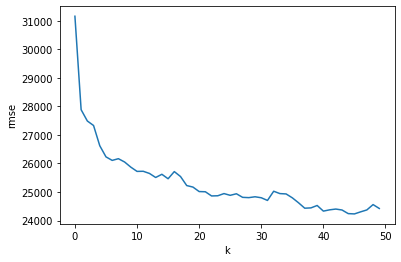

In [347]:
plt.plot(list(rmse_dict.keys()), list(rmse_dict.values()))
plt.xlabel('k')
plt.ylabel('rmse')

In [346]:
for i in range(30, 50):
    rmse = train_and_test(filtered_df, k=i)
    rmse_dict[i] = rmse
        
rmse_dict

{0: 31159.98584182165,
 1: 27883.935790531526,
 2: 27488.277433679348,
 3: 27330.729334205622,
 4: 26622.182700732126,
 5: 26231.501379260684,
 6: 26107.628518047626,
 7: 26167.269293523506,
 8: 26050.959792036905,
 9: 25871.072787690468,
 10: 25722.32836026229,
 11: 25726.07353761627,
 12: 25650.677702316694,
 13: 25508.928716534592,
 14: 25620.50406304513,
 15: 25464.280227095023,
 16: 25714.956669000858,
 17: 25542.487698413555,
 18: 25225.875027086095,
 19: 25172.86446356838,
 20: 25015.68119993209,
 21: 25008.4000054712,
 22: 24861.68315548054,
 23: 24868.281053322058,
 24: 24944.343522783183,
 25: 24883.787136079125,
 26: 24937.977987900485,
 27: 24812.891538409905,
 28: 24802.654133057928,
 29: 24832.779845602807,
 30: 24798.442488692795,
 31: 24704.483580427706,
 32: 25026.732439308606,
 33: 24944.384421601833,
 34: 24932.062584438216,
 35: 24795.881830650196,
 36: 24622.350347496038,
 37: 24432.122757252295,
 38: 24443.382807091395,
 39: 24527.324889924326,
 40: 24330.03124005

In [348]:
# above graph shows that at k = 45, rmse reaches its lowest value
# slice the dict to 30 - 50 to blow up the graph
a = dict(itertools.islice(rmse_dict.items(), 30, 50))

Text(0, 0.5, 'rmse')

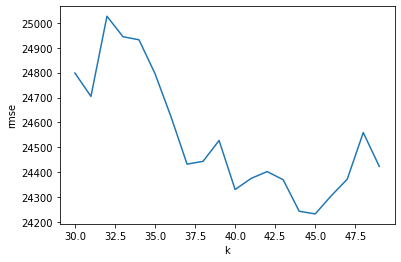

In [350]:
plt.plot(list(a.keys()), list(a.values()))
plt.xlabel('k')
plt.ylabel('rmse')

RMSE reaches the lowest value, when k = 45

# Conclusion

After experiment, we can conclude that 
- coef = 0.1, 
- selecting those categorical columns: 
       'Land Contour', 'Lot Config', 'Bldg Type', 'Heating', 'Roof Style',
       'Foundation', 'MS Zoning', 'Condition 2', 'House Style', 'Roof Matl',
       'Condition 1', 'MS SubClass', 'Neighborhood'.
- KFold = 45

would result in the best house price prediction, rmse is 24231.95, which is better than the result 29112.15 provided by dataquest. 